# Chap2. 간단한 분류 알고리즘 훈련 

In [1]:
import numpy as np

1. 퍼셉트론 구현

In [24]:
class Perceptron(object) :
    
    
    # __init__ ;객체 초기값을 설정해야 할 때, 생성자를 구현 
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta                      #학습률(0~1)
        self.n_iter = n_iter              #훈련데이터셋을 반복하는 횟수
        self.random_state = random_state  #가중치 무작위 초기화를 위한 난수 생성기(random seed)
    
    
    # 가중치 초기화 후, 훈련 데이터셋에 있는 모든 샘플 반복하여 가중치 업데이트
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)                 #지정한 seed를 통해 동일한 결과 재현
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) #정규분포를 땨르는 random value
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) 
                self.w_[1:] += update * xi
                self.w_[0] += update                           
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    
    # 두 입력 배열의 내적화 (z=wx)
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    # prediction
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
            

2. 붓꽃 데이터셋에 적용

 - 데이터 불러오기

In [4]:
import os
import pandas as pd

In [8]:
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


  - 이진분류(setosa vs versicolor)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
X = df.iloc[0:100, [0,2]].values

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

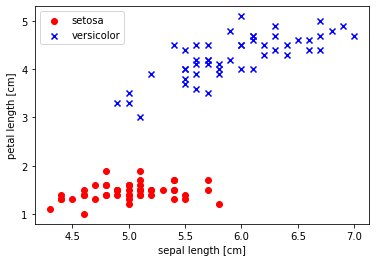

In [22]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

 - Perceptron - 반복횟수에 따른 오차

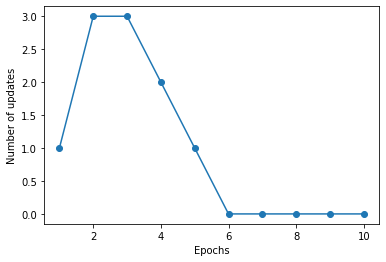

In [25]:
ppn = Perceptron(eta=0.1, n_iter=10) #학습률=0.1, 반복횟수=10
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

=> 6번째 반복 이후부터 오차가 0으로 완벽히 분류하였음을 확인해 볼 수 있다.



- 결정 경계 시각화

In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1          #설명변수 x1의 최소값, 최대값
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1          #설명변수 x2의 최소값, 최대값
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),  #grid 배열 형성
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #예측 (ravel():1차원으로 변환)
    Z = Z.reshape(xx1.shape)                                       #동일한 grid로 형성
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)                #등고선 그래프 작성
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 샘플의 산점도
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

C:\Users\eunju\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


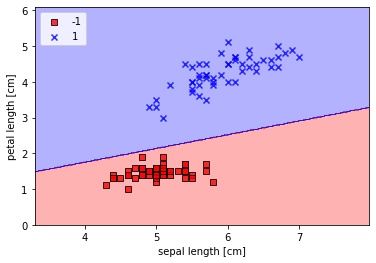

In [34]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

=> 퍼셉트론이 학습한 결정 경계가 두개의 붓꽃을 완벽하게 분류함

3. 아달린 

In [2]:
class AdalineGD(object):
    
    """
    eta : 학습률
    n_iter : 반복횟수
    random_state :  난수 생성기 seed
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta        #학습률
        self.n_iter = n_iter  #반복횟수
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)       #항등함수 
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors) #1~m까지의 가중치 - 
            self.w_[0] += self.eta * errors.sum()     #절편(0번째 가중치)
            cost = (errors**2).sum() / 2.0            #SSE(비용함수)
            self.cost_.append(cost)
        return self
    
    def net_input(self, X) :
        return np.dot(X, self.w_[1:]) + self.w_[0] #최종입력계산
    
    def activation(self, X) :
        return X #선형활성화 계산
    
    def predict(self, X) :
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1 , -1) # 단위계단함수로 클래스 반환
    

학습률에 따른 비용 그래프

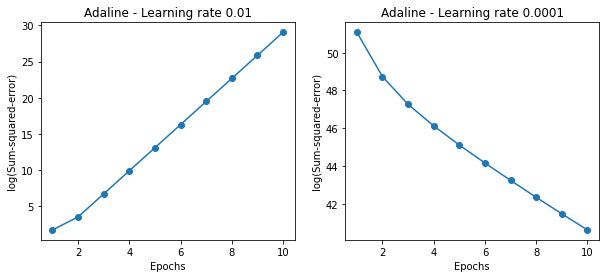

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4)) #빈그림 세팅

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_) +1), np.log10(ada1.cost_), marker="o")
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) +1), ada2.cost_, marker="o")
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

학습률 0.01 : 학습률이 너무 커 최솟값을 지나쳤다. 이로 인해 비용 함수를 최소화하지 못함
학습률 0.0001 : 학습률이 너무 작아 최솟값에 수렴하기 위해서는 아주 많은 epoch가 필요

특성 스케일을 조정하여 경사 하강법 결과 향상 - 표준화 방법

In [16]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

C:\Users\eunju\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


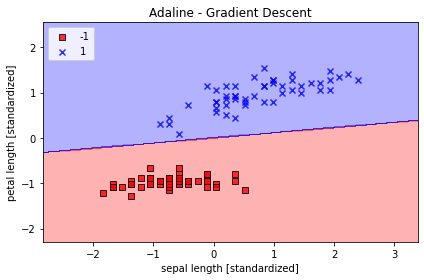

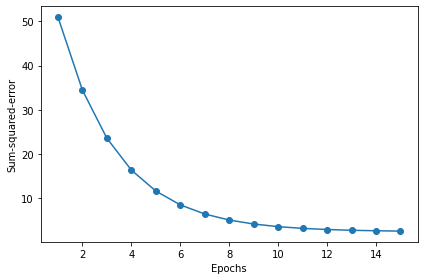

In [20]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline - Gradient Descent")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.tight_layout()
plt.show()

확률적 경사 하강법

In [22]:
class AdalineSGD(object):
    
    """
    eta : 학습률
    n_iter : 반복횟수
    shuffle : 에포크마다 훈련데이터 섞기
    random_state :  난수 생성기 seed
    w_ : 학습된 가중치
    cost_ : 모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용함수의 제곱합
    """
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta        #학습률
        self.n_iter = n_iter  #반복횟수
        self.random_state = random_state
        self.w_initialized = False
        self.shuffle = shuffle
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle :
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y) : #가중치를 초기화하지 않고 학습
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] >1 :
            for xi, target in zip(X,y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self, X, y): #훈련데이터 섞기
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self,m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True        
        
    def _update_weights(self, xi, target): #아달린학습규칙으로 가중치 업데이트(각 훈련샘플에 대해)
        output = self.activation(self.net_input(xi)) #항등함수 
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error) #1~m까지의 가중치 - 
        self.w_[0] += self.eta * error     #절편(0번째 가중치)
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X) :
        return np.dot(X, self.w_[1:]) + self.w_[0] #최종입력
    
    def activation(self, X) :
        return X #선형활성화 계산
    
    def predict(self, X) :
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1 , -1) #단위계단함수로 클래스 반환
    

C:\Users\eunju\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


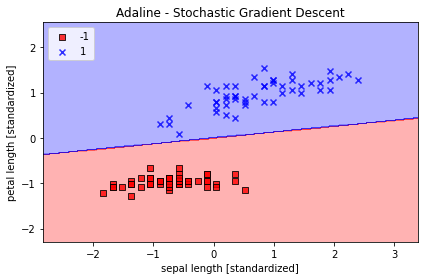

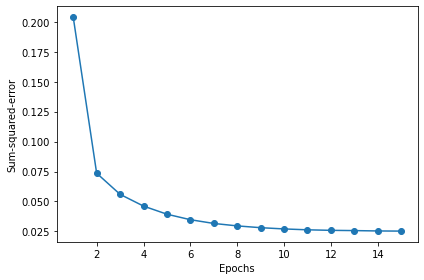

In [23]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.tight_layout()
plt.show()